
--- Totais ---
Quantidade Total de Vértices: 11
Quantidade Total de Arestas: 4
Quantidade Total de Arcos: 30

--- Requeridos ---
Quantidade de Vértices Requeridos: 4
Quantidade de Arestas Requeridas: 3
Quantidade de Arcos Requeridos: 11

--- Outros ---
Densidade do Grafo: 0.3090909090909091
Componentes Conectados: 1
Grau (mínimo, máximo): (3, 5)
Intermediação: {'3': 6, '7': 2, '8': 8, '9': 18, '1': 10, '10': 12, '2': 20, '4': 0, '5': 12, '11': 6, '6': 8}
Caminho Médio: 19.89090909090909
Diâmetro: 36


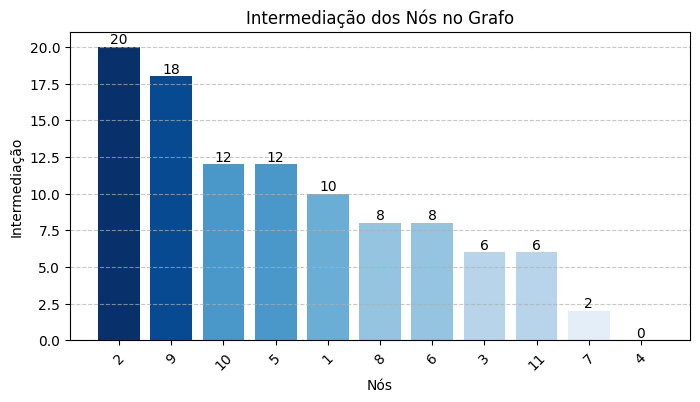

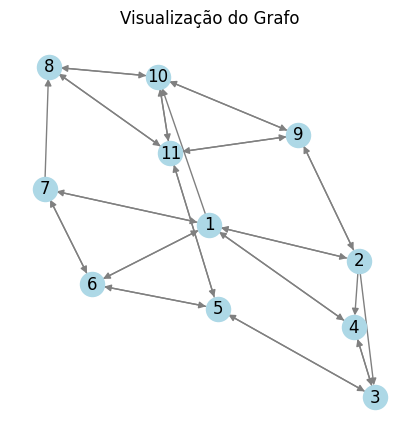

In [12]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
sys.path.append("../src")
sys.path.append("../data")

from leitura_dados import ler_arquivo
from estatisticas import *

grafo = ler_arquivo("../data/mggdb_0.25_4.dat")

print("\n--- Totais ---")
print(f"Quantidade Total de Vértices: {quantidade_vertices(grafo)}")
print(f"Quantidade Total de Arestas: {quantidade_arestas(grafo)}")
print(f"Quantidade Total de Arcos: {quantidade_arcos(grafo)}")

print("\n--- Requeridos ---")
print(f"Quantidade de Vértices Requeridos: {quantidade_vertices_requeridos(grafo)}")
print(f"Quantidade de Arestas Requeridas: {quantidade_arestas_requeridas(grafo)}")
print(f"Quantidade de Arcos Requeridos: {quantidade_arcos_requeridos(grafo)}")

print("\n--- Outros ---")
print("Densidade do Grafo:", densidade(grafo))
print("Componentes Conectados:", componentes_conectados(grafo))
print("Grau (mínimo, máximo):", grau_min_max(grafo))

caminhos, caminhos_completos = floyd_warshall(grafo)

print("Intermediação:", intermediacao(grafo, caminhos_completos)) 
print("Caminho Médio:", caminho_medio(caminhos))
print("Diâmetro:", diametro(caminhos))

# Dados da intermediação
intermediacao_dict = intermediacao(grafo, caminhos_completos)

# Ordenação dos nós pela intermediação (do maior para o menor)
nos_ordenados = sorted(intermediacao_dict.keys(), key=lambda x: intermediacao_dict[x], reverse=True)
valores_ordenados = [intermediacao_dict[no] for no in nos_ordenados]

# Criando o gráfico de barras
plt.figure(figsize=(8, 4))
valores_ordenados = np.array(valores_ordenados)  # Converte a lista em um array NumPy
norm = plt.Normalize(min(valores_ordenados), max(valores_ordenados))  # Normaliza os valores
colors = plt.cm.Blues(norm(valores_ordenados))  # Aplica coloração baseada na normalização

bars = plt.bar(nos_ordenados, valores_ordenados, color=colors)

# Adicionando os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Melhorias visuais
plt.xlabel("Nós")
plt.ylabel("Intermediação")
plt.title("Intermediação dos Nós no Grafo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

G = nx.DiGraph()

for aresta in grafo.arestas:
    G.add_edge(aresta["de"], aresta["para"])

for arco in grafo.arcos:
    G.add_edge(arco["de"], arco["para"], color='red')  # Diferencie os arcos das arestas

plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
plt.title("Visualização do Grafo")
plt.show()
